### Tutorial 4 (Date 16 Sep, 2019)

Today's Attendance: https://forms.gle/96oV9dG7RGc7ug6R9

Today's Notebook link: https://bit.ly/2mi0KW7

Topics
- Google NGram Viewer
- Constituency Parsers
- Dependency Parsers
- Tree Searching

References: A lot of the content in today's notebook is taken from Jurafsky and Martin's book, Chapter 12: 

https://web.stanford.edu/~jurafsky/slp3/12.pdf





# 1. Google N-gram Viewer

https://books.google.com/ngrams/

Lets you see the relative frequencies of different n-grams in some particular corpus for a specified range of time.

It has some advanced features as well:
- **Wildcard search** : Replace any word with a * and it will substitute it with the top ten replacements by freq
- **Inflection search** : Concatenate "_INF" to any word to show its different inflections
- **Case-insenstive search** : Use the check-box

Mixing different inflections for a single ngram is not allowed:

(for eg: book_INF * hotel), 

but you can use it for a different grams 

(for eg: book_INF a hotel, book * a hotel)

For more details, check this page: https://books.google.com/ngrams/info

# 2. Constituency Parsers

Jurafsky and Martin's book defines syntactic parsing as:

"Syntactic parsing is the task of recognizing a sentence and assigning a syntactic
structure to it.""

An example of a constituency tree is as follows:

Consider the sentence:

John sees Bill.

Some online demos for syntactic parsing: 

 - Enju: http://www.nactem.ac.uk/enju/demo.html
 - AllenNLP: https://demo.allennlp.org/constituency-parsing/

In [0]:
## Consituency Tree for "John see Bill"
string= '''
            Sentence (S)
                 |
   +-------------+------------+
   |                          |
 Noun (N)                Verb Phrase (VP)
   |                          |
 John                 +-------+--------+
                      |                |
                    Verb (V)         Noun (N)
                      |                |
                    sees              Bill


'''

In [9]:
print(string)


            Sentence (S)
                 |
   +-------------+------------+
   |                          |
 Noun (N)                Verb Phrase (VP)
   |                          |
 John                 +-------+--------+
                      |                |
                    Verb (V)         Noun (N)
                      |                |
                    sees              Bill





These parses are defined based on some phrase structure grammar such as:

S -> NP VP

NP -> N

VP -> V N

N -> John

V -> sees

N -> Bill
  

#### Constituency trees have some direct useful applications
- grammar checking (a sentence that cannot be parsed may have grammatical errors). 




- intermediate representation for semantic analysis, which is then useful in applications such as Question Answering (QA), Information Extraction (IE) etc.



**Grammar checking example**: 

"sees John Bill" may not give any parse that has a sentence structure. 

Let's try this here: https://demo.allennlp.org/constituency-parsing/
 
**QA example**

Consider the example provided in Jurafsky and Martin's book Chapter 12:

"What books were written by British women authors before 1800?"

To answer this question, we need to know that the subject of this sentence is "what books" and "british women authors" is a by-adjunct, so that the answer is extracted as a list of books and not a list of British women authors. 



### Ambiguity Issue in Parsing

There could be multiple valid syntactic parses which result to different interpretation in meaning.


In [8]:
import nltk
!pip install svgling ## A package for drawing linguistic-style const tree into SVG
import svgling

     |████████████████████████████████| 71kB 4.3MB/s 


Let's define a simple grammar for parsing an example sentence.


Example taken from : https://www.nltk.org/book/ch08.html#ex-elephant

In [0]:
groucho_grammar = nltk.CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> Det N | Det N PP | 'I'
... VP -> V NP | VP PP
... Det -> 'an' | 'my'
... N -> 'elephant' | 'pajamas'
... V -> 'shot'
... P -> 'in'
... """)



In [29]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)

trees = [tree for tree in parser.parse(sent)]
print("Number of valid trees as per the current grammar: {}".format(len(trees)))

Number of valid trees as per the current grammar: 2


Tree 1


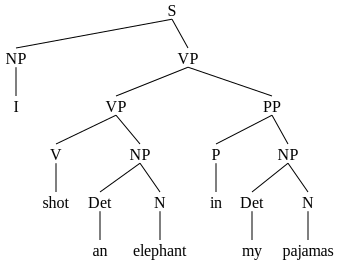

In [35]:
print("Tree 1")
svgling.draw_tree(trees[0])

Tree 2


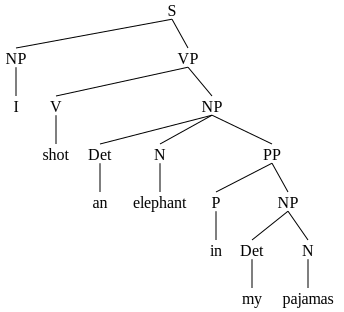

In [34]:
print("Tree 2")
svgling.draw_tree(trees[1])

### Using Spacy for Constituency Parsing

Berkley Neural Parser  (works with Spacy):

https://github.com/nikitakit/self-attentive-parser

In [1]:
!pip install benepar[cpu]  

     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for benepar: filename=benepar-0.1.2-cp36-cp36m-linux_x86_64.whl size=106727 sha256=c18efdd0935554a41f826bb80ec07d7ffd6a08ba77aeb11b945caf4f87f1f5d7
  Stored in directory: /root/.cache/pip/wheels/c6/f5/06/d88543b19a9b326007d7538298a139e994b1d2eecb003bf5af
Successfully built benepar


In [2]:
## Load language Model
## List of models: https://github.com/nikitakit/self-attentive-parser#available-models

import benepar
benepar.download('benepar_en2')  

[nltk_data] Downloading package benepar_en2 to /root/nltk_data...


True

In [0]:
import spacy
from benepar.spacy_plugin import BeneparComponent
nlp = spacy.load('en')

## Adding a component to spacy pipeline
nlp.add_pipe(BeneparComponent("benepar_en2"))


In [23]:
nlp.pipeline

[('tagger', <spacy.pipeline.pipes.Tagger at 0x7fd9584a99e8>),
 ('parser', <spacy.pipeline.pipes.DependencyParser at 0x7fd9525557c8>),
 ('ner', <spacy.pipeline.pipes.EntityRecognizer at 0x7fd952555828>),
 ('benepar', <benepar.spacy_plugin.BeneparComponent at 0x7fd95aa28be0>)]

In [0]:
doc = nlp(u"I shot an elephant in my pajamas.")
sent = list(doc.sents)[0]

In [12]:
## String format for the constituency tree
sent._.parse_string

'(S (NP (PRP I)) (VP (VBD shot) (NP (DT an) (NN elephant)) (PP (IN in) (NP (PRP$ my) (NNS pajamas)))) (. .))'

#### Convert bracketed string notation to Tree using nltk

In [15]:
from nltk.tree import Tree

tree = Tree.fromstring(sent._.parse_string)
type(tree)

nltk.tree.Tree

#### Draw the tree using svgling

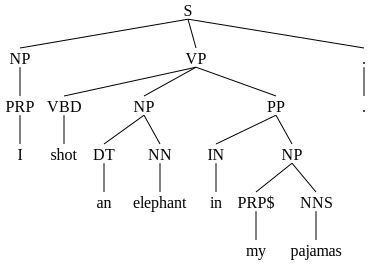

In [16]:
svgling.draw_tree(tree)

In [18]:
tree.leaves()

['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas', '.']

In [20]:
tree.productions()

[S -> NP VP .,
 NP -> PRP,
 PRP -> 'I',
 VP -> VBD NP PP,
 VBD -> 'shot',
 NP -> DT NN,
 DT -> 'an',
 NN -> 'elephant',
 PP -> IN NP,
 IN -> 'in',
 NP -> PRP$ NNS,
 PRP$ -> 'my',
 NNS -> 'pajamas',
 . -> '.']

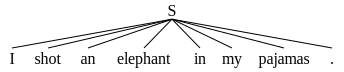

In [22]:
svgling.draw_tree(tree.flatten())

# 3. Dependency Trees

Another syntactic structure which does not rely on phrasal constituents and instead creates the structure only based on words (or lemmas). This structure has labelled edges which are binary relations defined between words.

Online demo from AllenNLP: https://demo.allennlp.org/dependency-parsing

In [0]:
import spacy
from benepar.spacy_plugin import BeneparComponent
nlp = spacy.load('en')


### Spacy's visualization Tool

In [0]:
## Import spacy visualization tool
from spacy import displacy

In [0]:
doc1 = nlp(u"The boy rode a bike.")

In [129]:
displacy.render(doc1, style="dep", jupyter=True, options={'compact':False})

In [130]:
doc1

The boy rode a bike.

#### A small diversion - you can also visualize Named Entities in Spacy

In [0]:
en_str = '''
This is an example string. Harry Potter is a name of an individual. Ron Weasley and Draco Malfoy are his school-mates.
Voldemort is another individual who has an army of Death Eaters.
He belongs to the Hogwart school. Nobody actually know if the school actually exists. But, nevertheless, people love the concept.
Do you think the NER-System, Spacy, will capture all the named entities in this string correctly?
'''

doc2 = nlp(en_str)

In [37]:
displacy.render(doc2, style="ent", jupyter=True)

In [38]:
doc2.ents

(Harry Potter,
 Ron Weasley,
 Draco Malfoy,
 Voldemort,
 Death Eaters,
 Hogwart,
 the NER-System,
 Spacy)

## 3.1 CoNLL-U format

A standard format for representing represeting Universal dependency structures (https://universaldependencies.org/docs/format.html)

In [49]:
!pip install spacy_conll
from spacy_conll import Spacy2ConllParser

spacyconll = Spacy2ConllParser()

In [0]:
# `parse` returns a generator of the parsed sentences
string = "The boy rode a bike."

conllu = ""
for parsed_sent in spacyconll.parse(input_str=string):
    conllu+=parsed_sent

In [132]:
print(conllu)

1	The	the	DET	DT	_	2	det	_	_
2	boy	boy	NOUN	NN	Number=sing	3	nsubj	_	_
3	rode	ride	VERB	VBD	VerbForm=fin|Tense=past	0	ROOT	_	_
4	a	a	DET	DT	_	5	det	_	_
5	bike.	bike.	NOUN	NN	Number=sing	3	dobj	_	_



### Convert CoNLL-U to a graph

In [0]:
from nltk import DependencyGraph

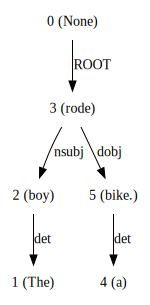

In [134]:
dep_graph = DependencyGraph(conllu, top_relation_label='ROOT')
dep_graph

In [135]:
for x in dep_graph.triples():
  print(x)

(('rode', 'VERB'), 'nsubj', ('boy', 'NOUN'))
(('boy', 'NOUN'), 'det', ('The', 'DET'))
(('rode', 'VERB'), 'dobj', ('bike.', 'NOUN'))
(('bike.', 'NOUN'), 'det', ('a', 'DET'))


# 4. Universal Dependencies Data

Details at: https://universaldependencies.org/

List of all dependencies: https://universaldependencies.org/u/dep/all.html

In [74]:
!pip install wget
import wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=d8b77f48eeaf62075a7bffd5cb453eba665d2cfe2c18f631b668af5ab8018da4
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


#### Download English Web Treebank UD Data

In [75]:
wget.download("https://raw.githubusercontent.com/UniversalDependencies/UD_English-EWT/master/en_ewt-ud-train.conllu", 
              'en_ewt-ud-train.conllu')

'en_ewt-ud-train.conllu'

### Read data into dictionary graph structures

In [0]:
def get_structs(file):
    '''
    Input: a conllu file
  
    Output: a dictionary of (key, value) pairs
          key: sentence id
          value: NLTK Dependency Graph object
    '''
    structures = {}
    with open(file, 'r') as f:
      iden = 0
      a = ""
      words = []
      
      for line in f:
        #Skip lines that start with a '#' (IDs)
        if line[0]=='#':
          continue

        ## Keep appending lines for a sentence
        elif line != "\n":
          a += line
          words.append(line.split("\t")[1])

        ## When the sentences finishes, make a Dep graph
        else:
          iden += 1
          structure = DependencyGraph(a, top_relation_label='root')
          sent = " ".join(words)
          sent_id = file.split("-")[-1] + " sent_" + str(iden)
          structures[sent_id] = structure
          a = ""
          words = []  
  
    return structures
  
def get_info(struct, param="word"):
    '''
    Input: NLTK Dependency Graph object
          
    Output: a list of the parameters indexed by token's orders
    '''
    len_sentence = len(struct.nodes)-1 #subtract the Top tag above root
     
    tokens = [struct.nodes[idx+1][param] for idx in range(len_sentence)]  

    return tokens


In [0]:
structures = get_structs("en_ewt-ud-train.conllu")

#### An example from the corpus

['Hiller', 'asked', ',', 'inquiring', 'about', 'Gen.', 'Pervaiz', 'Musharraf', ',', 'who', 'seized', 'control', 'of', 'the', 'country', 'October', '12', '.']


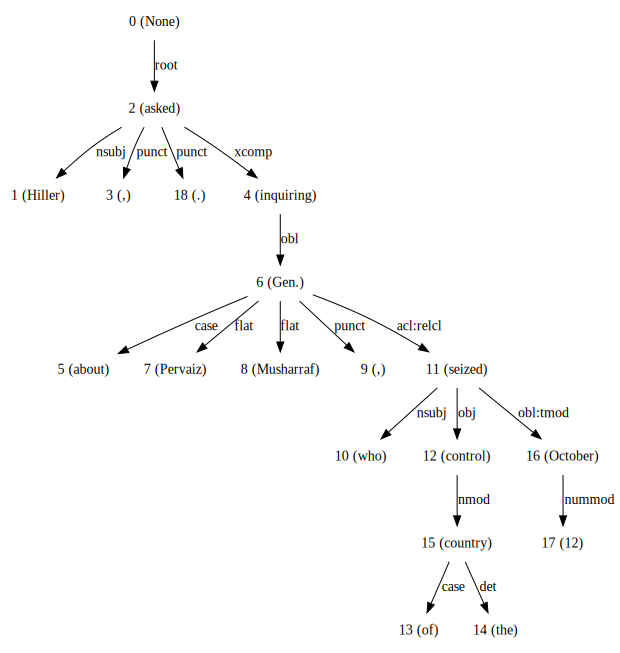

In [240]:
idx = 178
sent_id = 'train.conllu sent_' + str(idx)
print(get_info(structures[sent_id], param="word"))
structures[sent_id]

In [0]:
structures[sent_id]

In [228]:
list(structures[sent_id].triples())[0][1]

'nsubj'

In [225]:
structures[sent_id].nodes

defaultdict(<function nltk.parse.dependencygraph.DependencyGraph.__init__.<locals>.<lambda>>,
            {0: {'address': 0,
              'ctag': 'TOP',
              'deps': defaultdict(list, {'root': [4]}),
              'feats': None,
              'head': None,
              'lemma': None,
              'rel': None,
              'tag': 'TOP',
              'word': None},
             1: {'address': 1,
              'ctag': 'PRON',
              'deps': defaultdict(list, {}),
              'feats': 'Case=Nom|Gender=Masc|Number=Sing|Person=3|PronType=Prs',
              'head': 4,
              'lemma': 'he',
              'rel': 'nsubj',
              'tag': 'PRP',
              'word': 'He'},
             2: {'address': 2,
              'ctag': 'AUX',
              'deps': defaultdict(list, {}),
              'feats': 'VerbForm=Fin',
              'head': 4,
              'lemma': 'could',
              'rel': 'aux',
              'tag': 'MD',
              'word': 'could'},
    

In [241]:
list(zip(get_info(structures[sent_id], param="word"),
    get_info(structures[sent_id], param="lemma"),
    get_info(structures[sent_id], param="rel")))

[('Hiller', 'Hiller', 'nsubj'),
 ('asked', 'ask', 'root'),
 (',', ',', 'punct'),
 ('inquiring', 'inquire', 'xcomp'),
 ('about', 'about', 'case'),
 ('Gen.', 'Gen.', 'obl'),
 ('Pervaiz', 'Pervaiz', 'flat'),
 ('Musharraf', 'Musharraf', 'flat'),
 (',', ',', 'punct'),
 ('who', 'who', 'nsubj'),
 ('seized', 'seize', 'acl:relcl'),
 ('control', 'control', 'obj'),
 ('of', 'of', 'case'),
 ('the', 'the', 'det'),
 ('country', 'country', 'nmod'),
 ('October', 'October', 'obl:tmod'),
 ('12', '12', 'nummod'),
 ('.', '.', 'punct')]

In [244]:
'xcomp' in set(get_info(structures[sent_id], param="rel"))

True

### Exercises (Search queries)

### Q1. Find examples which have a ccomp relation and have less than 12 words.
Definition of ccomp: https://universaldependencies.org/u/dep/ccomp.html





In [0]:
ccomp_ids = []
for key in structures:
  rel_tokens = get_info(structures[key], param="rel")
  if ('ccomp' in set(rel_tokens)) & (len(rel_tokens)<=12):
    ccomp_ids.append(key)

In [264]:
print("# of sentences with a ccomp relation and having less than 12 words: {}".format(len(ccomp_ids)))

# of sentences with a ccomp relation and having less than 12 words: 256


#### Check a random sample

In [267]:
import random
sample = random.sample(ccomp_ids, 1)[0]
print(sample)
#train.conllu sent_10103

train.conllu sent_10103


Very glad that we went with them .


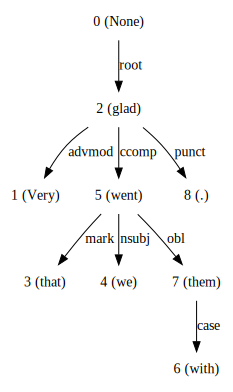

In [268]:
print(" ".join(get_info(structures[sample], param="word")))
structures[sample]

### Q2. Find some examples (len <=12 words) where a subject has a verb modifier.

In [0]:
def get_rel_index(struct, rel='nsubj'):
  '''
  Input: A Dependency Graph object
  
  Output: a list of indexes of words which are have a particular rel.
  '''
  idxs = []
  for key in struct.nodes:
    if struct.nodes[key]['rel']==rel:
      idxs.append(key)
      
  return idxs
      

def check_index_dep(struct_dict, idx, pos=None):
  '''
  Check if struct_dict[idx] has a deps == dep with a pos==pos
  '''
  if struct_dict[idx]['deps']:
    deps_idxs = struct_dict[idx]['deps'].values()
    for dep_idx in deps_idxs:
      if struct_dict[dep_idx[0]]['ctag'] == pos:
        return True
      else:
        continue
    return False
  
  else:
    return False
    

In [315]:
q2_ids = []
for key in structures:
  struct = structures[key]
  if len(struct.nodes)<13:
    nsubj_idxs = get_rel_index(struct, rel='nsubj')
    for idx in nsubj_idxs:
      if check_index_dep(struct.nodes, idx, pos='VERB'):
        q2_ids.append(key)
      
print("Number of cases found: {}".format(len(q2_ids)))

Number of cases found: 51


#### Check a random sample

In [318]:
import random
sample = random.sample(q2_ids, 1)[0]
print(sample)
#train.conllu sent_10103

train.conllu sent_11044


Excellent chefs are in the kitchen preparing memorable breakfasts .


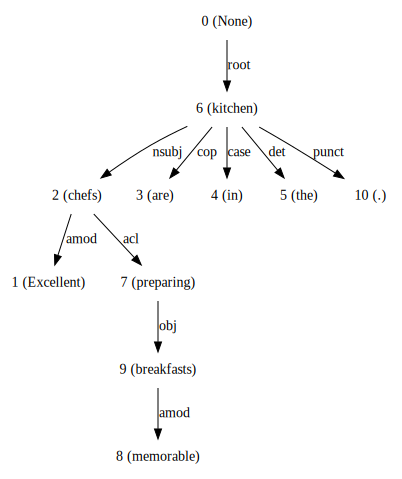

In [319]:
print(" ".join(get_info(structures[sample], param="word")))
structures[sample]

In [320]:
structures[sample].nodes

defaultdict(<function nltk.parse.dependencygraph.DependencyGraph.__init__.<locals>.<lambda>>,
            {0: {'address': 0,
              'ctag': 'TOP',
              'deps': defaultdict(list, {'root': [6]}),
              'feats': None,
              'head': None,
              'lemma': None,
              'rel': None,
              'tag': 'TOP',
              'word': None},
             1: {'address': 1,
              'ctag': 'ADJ',
              'deps': defaultdict(list, {}),
              'feats': 'Degree=Pos',
              'head': 2,
              'lemma': 'excellent',
              'rel': 'amod',
              'tag': 'JJ',
              'word': 'Excellent'},
             2: {'address': 2,
              'ctag': 'NOUN',
              'deps': defaultdict(list, {'acl': [7], 'amod': [1]}),
              'feats': 'Number=Plur',
              'head': 6,
              'lemma': 'chef',
              'rel': 'nsubj',
              'tag': 'NNS',
              'word': 'chefs'},
            